# IMDB Case study for the Budget

### About Data Sets
Analysis is based on IMDB Data sets

## Load the datasets
In order to load the datasets, we need a few python modules. In a new cell in your notebook, type the following lines.

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Import the CSV data set using Pandas
data = pd.read_csv('tn.movie_budgets.csv')

In [45]:
#exploring the data
#printing fast few rows of the data set
data.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


## Step-by-Step Data Analysis Process

## 1. **Understand the Project Scope and Objective:**
   - Displaying Basic information.
   - Determine the key variables and metrics you need to explore or analyze in the data.

In [46]:
# Show the number of rows and columns
print("Shape of the data:", data.shape)

# Get an overview of the columns and their data types
print("Columns and data types:")
print(data.info())

# Show descriptive statistics for numeric columns
print("Descriptive statistics:")
print(data.describe())


Shape of the data: (5782, 6)
Columns and data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB
None
Descriptive statistics:
                id
count  5782.000000
mean     50.372363
std      28.821076
min       1.000000
25%      25.000000
50%      50.000000
75%      75.000000
max     100.000000


## 2. **Familiarizing the Data:**
   - Open the CSV data sets using a spreadsheet program or programming language (e.g., Python with Pandas).
   - Explore the structure and content of the data, including the column names, data types, and sample rows.
   - Identify any missing or incomplete data, outliers, or inconsistencies.


In [47]:
# Get a list of column names
column_names = data.columns.tolist()

# Print the column names
print(column_names)


['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']


In [48]:
# Get the data types of columns
data_types = data.dtypes

# Print the data types
print(data_types)

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object


In [49]:
# Get the number of unique values in each column
unique_value_counts = data.nunique()

# Print the number of unique values
print(unique_value_counts)


id                    100
release_date         2418
movie                5698
production_budget     509
domestic_gross       5164
worldwide_gross      5356
dtype: int64


In [50]:
# Display the first few rows of the data set
print(data.head())

# Display a random sample of rows
print(data.sample(10))  # Change the number (e.g., 10) to the desired sample size

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       Avatar   
1   2  May 20, 2011  Pirates of the Caribbean: On Stranger Tides   
2   3   Jun 7, 2019                                 Dark Phoenix   
3   4   May 1, 2015                      Avengers: Age of Ultron   
4   5  Dec 15, 2017            Star Wars Ep. VIII: The Last Jedi   

  production_budget domestic_gross worldwide_gross  
0      $425,000,000   $760,507,625  $2,776,345,279  
1      $410,600,000   $241,063,875  $1,045,663,875  
2      $350,000,000    $42,762,350    $149,762,350  
3      $330,600,000   $459,005,868  $1,403,013,963  
4      $317,000,000   $620,181,382  $1,316,721,747  
      id  release_date                        movie production_budget  \
128   29   Nov 7, 2014                   Big Hero 6      $165,000,000   
98    99   Jul 7, 2017       Spider-Man: Homecoming      $175,000,000   
689   90  Jul 30, 2004                  The Village   

In [51]:
#Investigating missing values
# Check for missing values in each column
missing_value_counts = data.isnull().sum()

# Print the missing value counts
print(missing_value_counts)

# Calculate the percentage of missing values in each column
missing_value_percentages = (missing_value_counts / len(data)) * 100

# Print the missing value percentages
print(missing_value_percentages)


id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64
id                   0.0
release_date         0.0
movie                0.0
production_budget    0.0
domestic_gross       0.0
worldwide_gross      0.0
dtype: float64


## 3. **Clean and Preprocess the Data:**
   - Handle missing values: Decide how to handle missing data (e.g., removing rows, imputing values).
   - Handle duplicates: Check for and remove any duplicate entries if necessary.
   - Perform data type conversions, such as converting date strings to date objects.
   - Address any data inconsistencies or errors, ensuring the data is in a consistent format.


In [52]:
# Check for duplicate rows in the entire data set
duplicate_rows = data.duplicated()

# Remove duplicate rows
data = data.drop_duplicates()


In [53]:
# Drop rows with missing values
data = data.dropna()

# Drop rows with missing values in specific columns
data = data.dropna(subset=['id', 'release_date'])


 ## 4. **Data Exploration and Descriptive Statistics:**
   - Compute basic summary statistics (e.g., mean, median, standard deviation) for relevant variables.
   - Create visualizations (histograms, scatter plots, bar charts) to gain insights into the data distribution and relationships between variables.
   - Identify trends, patterns, or outliers in the data.

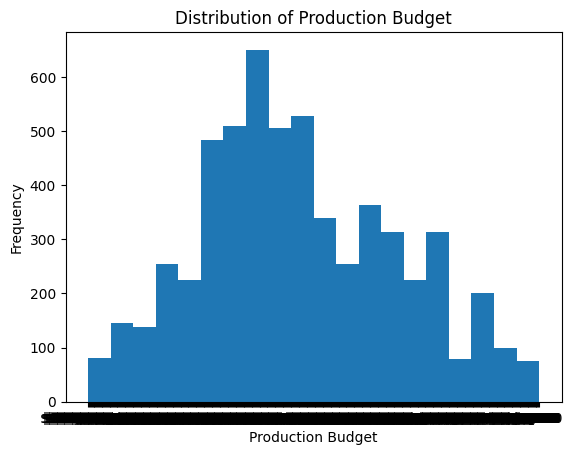

In [54]:
import matplotlib.pyplot as plt

# Plot a histogram of the production budget
plt.hist(data['production_budget'], bins=20)
plt.xlabel('Production Budget')
plt.ylabel('Frequency')
plt.title('Distribution of Production Budget')
plt.show()

In [60]:
# Summary statistics
print("Descriptive statistics:")
print(data[['production_budget', 'domestic_gross', 'worldwide_gross']].describe())

Descriptive statistics:
       production_budget  domestic_gross  worldwide_gross
count                0.0             0.0              0.0
mean                 NaN             NaN              NaN
std                  NaN             NaN              NaN
min                  NaN             NaN              NaN
25%                  NaN             NaN              NaN
50%                  NaN             NaN              NaN
75%                  NaN             NaN              NaN
max                  NaN             NaN              NaN


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9976\2543794128.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['production_budget'] = data['production_budget'].str.replace('[^\d.]', '').astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9976\2543794128.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.rainbow))


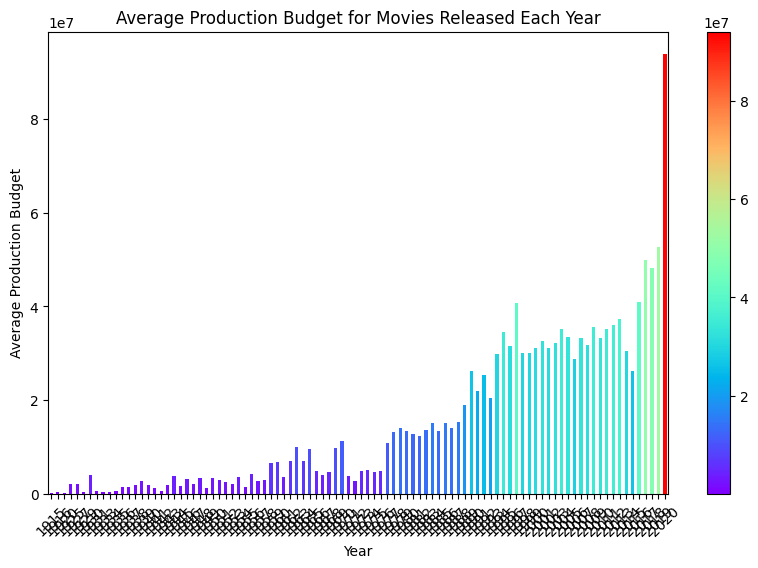

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Step 1: Load the data
data = pd.read_csv('tn.movie_budgets.csv')

# Step 2: Clean the data
data['release_date'] = pd.to_datetime(data['release_date'])
data['production_budget'] = data['production_budget'].str.replace('[^\d.]', '').astype(float)

# Step 3: Calculate average production budget per year
average_budget_per_year = data.groupby(data['release_date'].dt.year)['production_budget'].mean()

# Step 4: Plot a bar chart with suitable scale and rainbow colors
plt.figure(figsize=(10, 6))
norm = plt.Normalize(vmin=average_budget_per_year.min(), vmax=average_budget_per_year.max())
colors = cm.rainbow(norm(average_budget_per_year))
average_budget_per_year.plot(kind='bar', color=colors)
plt.xlabel('Year')
plt.ylabel('Average Production Budget')
plt.title('Average Production Budget for Movies Released Each Year')
plt.xticks(rotation=45)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.rainbow))
plt.show()


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9976\1746674564.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  data['production_budget'] = data['production_budget'].str.replace('[^\d.]', '').astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9976\1746674564.py:24: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.rainbow))


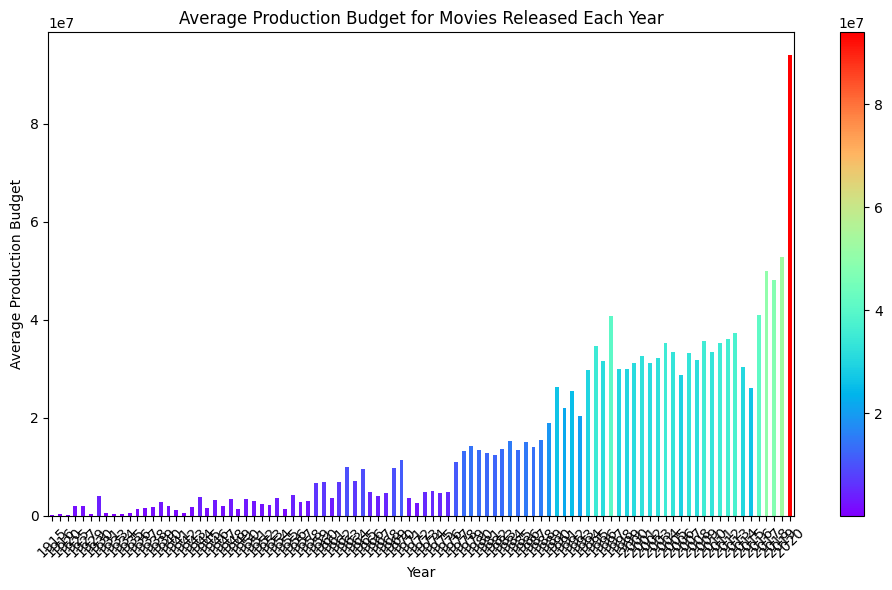

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Step 1: Load the data
data = pd.read_csv('tn.movie_budgets.csv')

# Step 2: Clean the data
data['release_date'] = pd.to_datetime(data['release_date'])
data['production_budget'] = data['production_budget'].str.replace('[^\d.]', '').astype(float)

# Step 3: Calculate average production budget per year
average_budget_per_year = data.groupby(data['release_date'].dt.year)['production_budget'].mean()

# Step 4: Plot a bar chart with suitable scale and rainbow colors
plt.figure(figsize=(10, 6))
norm = plt.Normalize(vmin=average_budget_per_year.min(), vmax=average_budget_per_year.max())
colors = cm.rainbow(norm(average_budget_per_year))
average_budget_per_year.plot(kind='bar', color=colors)
plt.xlabel('Year')
plt.ylabel('Average Production Budget')
plt.title('Average Production Budget for Movies Released Each Year')
plt.xticks(rotation=45)
plt.colorbar(cm.ScalarMappable(norm=norm, cmap=cm.rainbow))
plt.tight_layout()
plt.show()


   ## 5. Hypothesis
   **Formulate Hypotheses:**

Hypothesis: There is a positive correlation between the production budget of a movie and its domestic and worldwide gross. Specifically, it is hypothesized that movies with higher production budgets tend to generate higher earnings both domestically and internationally.

This hypothesis suggests that as the budget invested in a movie increases, there is an expectation of a corresponding increase in both domestic and worldwide gross earnings. By analyzing the data and conducting further analysis, we can explore whether there is empirical evidence to support this hypothesis or if the relationship between the variables is different from what is expected.



## 6. Challenge to the Solution

Instead of calculating the average production budget per year, let's explore the relationship between the production budget and the worldwide gross revenue of movies. We'll examine whether movies with higher production budgets tend to generate higher worldwide gross earnings.

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9976\2564901726.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data['production_budget'] = data['production_budget'].str.replace('[^\d.]', '').astype(float)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_9976\2564901726.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  data['worldwide_gross'] = data['worldwide_gross'].str.replace('[^\d.]', '').astype(float)


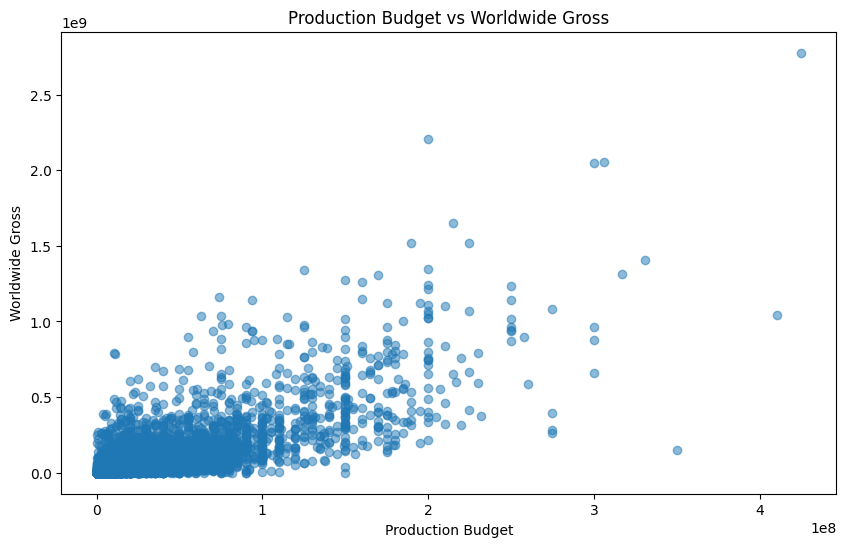

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the data
data = pd.read_csv('tn.movie_budgets.csv')

# Step 2: Clean the data
data['production_budget'] = data['production_budget'].str.replace('[^\d.]', '').astype(float)
data['worldwide_gross'] = data['worldwide_gross'].str.replace('[^\d.]', '').astype(float)

# Step 3: Plot a scatter plot of production budget vs worldwide gross
plt.figure(figsize=(10, 6))
plt.scatter(data['production_budget'], data['worldwide_gross'], alpha=0.5)
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Production Budget vs Worldwide Gross')
plt.show()
